# Code to Fetch Images from Imagenet using URL's

In this tutorial, we will write a small pytho sript that will help us to fetch the images from Imagenet using image URL's. This is the best and fastest way to get the images for a dataset if you dont want to create your own dataset.

Let's get started.

In [1]:
# Import Dependencies
import os
import cv2
import numpy as np
from urllib import request

### Function to fetch Rose Images

Firstly, we will write a function to fetch the rose images from URL's and later on the images for the Tulips.

In [2]:
# Function to Fetch Rose Images
def fetchRoseImages():
    # Check if output directory exists or not
    # if it dosen't exists, create it
    # I am using the name 'rose' for the rose images directory. We'll use the directory name later on as the image label.
    if not os.path.exists('rose'):
        os.makedirs('rose/')
    
    # Copy Paste here the URL of the Imagenet webpage containing all the image URL's 
    rosesURL = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04971313'
    # Read the URL's and decode them
    readURL = request.urlopen(rosesURL).read().decode()
    
    # This is just to keep different names of images
    count = 1
    
    print('\n\n Fetching Images of Roses . . . \n\n')
    
    # Since, all URL's are in separate line, split it by '\n'
    for img in readURL.split('\n'):
        # Put code in a try except as some URL's might not have an image or might be broken.
        try:
            # Print all URL's
            print('Fetched: ',img)
            # Retrieve image from URL and save in 'rose/' directory
            request.urlretrieve(img,'rose/'+str(count)+'.jpg')
            count += 1
        except Exception as e:
            print('Exception Occured: ',str(e))           

### Function to fetch Tulip Images

Now, we will write a function to fetch the tulip images from URL's. This function is the same as the above function. The only change is the URL for the image webpage.

In [3]:
# Function to Fetch Tulip Images
def fetchTulipImages():
    # Check if output directory exists or not
    # if it dosen't exists, create it
    # I am using the name 'tulip' for the tulip images directory. We'll use the directory name later on as the image label.
    if not os.path.exists('tulip'):
        os.makedirs('tulip/')
    
    # Copy Paste here the URL of the Imagenet webpage containing all the image URL's 
    tulipsURL = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n12454159'
    # Read the URL's and decode them
    readURL = request.urlopen(tulipsURL).read().decode()
    
    # This is just to keep different names of images
    count = 1
    
    print('\n\n Fetching Images of Tulips . . . \n\n')
    
    # Since, all URL's are in separate line, split it by '\n'
    for img in readURL.split('\n'):
        # Put code in a try except as some URL's might not have an image or might be broken.
        try:
            # Print all URL's
            print('Fetched: ',img)
            # Retrieve image from URL and save in 'rose/' directory
            request.urlretrieve(img,'tulip/'+str(count)+'.jpg')
            count += 1
        except Exception as e:
            print('Exception Occured: ',str(e))           

Now you might think that we are done and we can run this code as it is. Well.....not yet. If you download these images as it is, you will see that some of the images in the folders created are missing or show that this photo is no longer available as below.

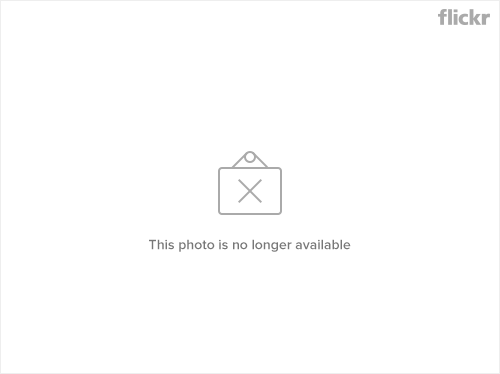

In [4]:
from IPython.display import Image
Image('InvalidImages/ugly.jpg')

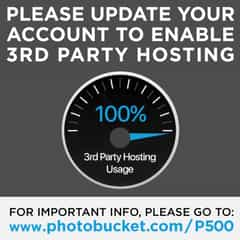

In [5]:
Image('InvalidImages/ugly1.jpg')

Well we don't want this as we dont want our model to start training and then suddenly after 20 minutes of training give us an error saying that it got an empty file. So, there are two methods to get rid of this.

1. Remove all these images by hand

2. Write a python script and let it do all the hard work.

Wel, we are programmers and maybe, somewhat lazy :P, so let's leave this hardwork to Python for now. Let's write a script to remove these images automatically.

In [6]:
# Function to Remove Invalid Images
# Compare all files in the rose and tulip folders and comapre all images with the invalid images
# If there is an invalid image, remove it from folder
def removeInvalidImages():
    for files in ['rose']:
        for img in os.listdir(files):
            for invalidImage in os.listdir('InvalidImages'):
                try:
                    imagePath = str(files)+'/'+str(img)
                    invalidImage = cv2.imread('InvalidImages/'+str(invalidImage))
                    currentImage = cv2.imread(imagePath)

                    if invalidImage.shape == currentImage.shape and not(np.bitwise_xor(invalidImage,currentImage).any()):
                        print('Removing Image: ',imagePath)
                        os.remove(imagePath)
                except Exception as e:
                    print('Exception Occured: ',str(e))
                    
    for files in ['tulip']:
        for img in os.listdir(files):
            for invalidImage in os.listdir('InvalidImages'):
                try:
                    imagePath = str(files)+'/'+str(img)
                    invalidImage = cv2.imread('InvalidImages/'+str(invalidImage))
                    currentImage = cv2.imread(imagePath)

                    if invalidImage.shape == currentImage.shape and not(np.bitwise_xor(invalidImage,currentImage).any()):
                        print('Removing Image: ',imagePath)
                        os.remove(imagePath)
                except Exception as e:
                    print('Exception Occured: ',str(e))

In [7]:
# Run both Functions
if __name__ == '__main__':
    fetchRoseImages()
    fetchTulipImages()
    removeInvalidImages()



 Fetching Images of Roses . . . 


Fetched:  http://farm4.static.flickr.com/3168/3283727603_41835a978a.jpg
Fetched:  http://farm5.static.flickr.com/4102/4801998960_d37cc4a6bc.jpg
Fetched:  http://farm4.static.flickr.com/3035/2725964794_7bdd6f666a.jpg
Fetched:  http://farm4.static.flickr.com/3388/4630683149_f2961a7c9a.jpg
Fetched:  http://farm6.static.flickr.com/5167/5370221215_bfa488cf7e.jpg
Fetched:  http://farm5.static.flickr.com/4035/4274458475_bbe8be50a4.jpg
Fetched:  http://www.profilethai.com/download/original/pink_rose_wallpaper_2993.jpg
Exception Occured:  HTTP Error 403: Forbidden
Fetched:  http://farm6.static.flickr.com/5110/5627905885_5cd59519a6.jpg
Fetched:  http://farm1.static.flickr.com/23/24521098_d32ede6841.jpg
Fetched:  http://farm6.static.flickr.com/5222/5646160015_3c1ec14b66.jpg
Fetched:  http://farm6.static.flickr.com/5228/5634846299_7abe2a28e8.jpg
Fetched:  http://farm6.static.flickr.com/5026/5627786062_0814cc0423.jpg
Fetched:  http://farm2.static.flickr.com/1433

Fetched:  http://farm1.static.flickr.com/78/181477095_99177daf6a.jpg
Fetched:  http://www.mzephotos.com/wallpapers/roses/pink-rose-1280x1024.jpg
Exception Occured:  HTTP Error 403: Forbidden
Fetched:  http://farm4.static.flickr.com/3021/3551691093_ceeef01bf0.jpg
Fetched:  http://farm5.static.flickr.com/4040/4338291839_37ce8f35a4.jpg
Fetched:  http://farm1.static.flickr.com/33/63275544_c137c851c3.jpg
Fetched:  http://farm6.static.flickr.com/5066/5645763265_a0e036c849.jpg
Fetched:  http://farm4.static.flickr.com/3291/3038271428_b2077b39ab.jpg
Fetched:  http://farm3.static.flickr.com/2511/3797092472_3eb0b81982.jpg
Fetched:  http://farm1.static.flickr.com/248/449502393_bc57dd6ed3.jpg
Fetched:  http://farm3.static.flickr.com/2465/3968043644_3737b36f97.jpg
Fetched:  http://www.bythedrop.com/gallery/var/albums/Flowers/Roses/Rose-Pink-Close-Up.jpg?m=1288646622
Exception Occured:  HTTP Error 404: File Not Found
Fetched:  http://farm4.static.flickr.com/3553/3936282559_fb8f14f588.jpg
Fetched:  ht

Fetched:  http://farm1.static.flickr.com/37/100029667_f3e07a9cef.jpg
Fetched:  http://farm6.static.flickr.com/5182/5646038889_b6f1592242.jpg
Fetched:  http://farm3.static.flickr.com/2463/3770167045_04986cdbd7.jpg
Fetched:  http://farm2.static.flickr.com/1287/571326364_a48de16f87.jpg
Fetched:  http://farm1.static.flickr.com/118/304722586_0a2ec83fea.jpg
Fetched:  http://farm1.static.flickr.com/47/154721453_ed182a92c3.jpg
Fetched:  http://farm6.static.flickr.com/5010/5641617519_27395d845a.jpg
Fetched:  http://farm6.static.flickr.com/5227/5633249266_7d815ac0e5.jpg
Fetched:  http://farm3.static.flickr.com/2715/4095278895_18125a3600.jpg
Fetched:  http://images.free-extras.com/pics/p/pink_rose-635.jpg
Exception Occured:  <urlopen error [Errno 11001] getaddrinfo failed>
Fetched:  http://a248.g.akamai.net/7/248/8278/20100225040209/www.sephora.com/assets/dyn/sku/1247626/1247626_sw.jpg
Exception Occured:  HTTP Error 403: Forbidden
Fetched:  http://www.allabouthappylife.com/wallpapers/widescreen_w

Fetched:  http://farm4.static.flickr.com/3216/2498857532_06571f9e68.jpg
Fetched:  http://farm5.static.flickr.com/4037/4675364646_0a7af2f98f.jpg
Fetched:  http://farm4.static.flickr.com/3106/3256631144_ccbbf4eb54.jpg
Fetched:  http://farm4.static.flickr.com/3139/2810416839_99afecc939.jpg
Fetched:  http://www.indiaonrent.com/forwards/c/center-of-the-pink-rose/res/_sl4d8.jpg
Fetched:  http://farm4.static.flickr.com/3202/3128960225_b0a36bbe76.jpg
Fetched:  http://farm2.static.flickr.com/1269/1022961569_586cc54eec.jpg
Fetched:  http://farm4.static.flickr.com/3391/3343268339_c1fa075138.jpg
Fetched:  http://fc08.deviantart.net/fs71/i/2010/034/a/0/Tea_Rose_Pink_Stock_by_MagpieMagic.jpg
Fetched:  http://www.cuyamaca.net/oh170/Plant_TNails1A/Camellia_sasanqua_Chansonette__Modesto_Ca__12-00__400.JPG
Exception Occured:  <urlopen error [Errno 11001] getaddrinfo failed>
Fetched:  http://farm1.static.flickr.com/18/23853948_37033081a4.jpg
Fetched:  http://farm4.static.flickr.com/3431/3404263296_2bba95

Fetched:  http://www.youwall.com/papel/pink_rose_wallpaper_2a209.jpg
Fetched:  http://farm1.static.flickr.com/226/521671677_85abb36edc.jpg
Fetched:  http://farm1.static.flickr.com/170/480253822_a2197c51bd.jpg
Fetched:  http://farm1.static.flickr.com/53/139017141_a136a0b488.jpg
Fetched:  http://farm1.static.flickr.com/87/222437539_319d4570b7.jpg
Fetched:  http://farm3.static.flickr.com/2371/2044378296_66997e5ecb.jpg
Fetched:  http://farm5.static.flickr.com/4125/5021424751_491527f89e.jpg
Fetched:  http://farm3.static.flickr.com/2686/4379089747_6c3b7aef68.jpg
Fetched:  http://farm4.static.flickr.com/3482/3261525182_9c20c8ee0f.jpg
Fetched:  http://farm5.static.flickr.com/4096/4782609174_c07b555d43.jpg
Fetched:  http://farm4.static.flickr.com/3165/2709392759_67db783d41.jpg
Fetched:  http://farm4.static.flickr.com/3284/2681585290_caa49cd7b3.jpg
Fetched:  http://farm3.static.flickr.com/2393/1704812763_6a4b5519ca.jpg
Fetched:  http://farm5.static.flickr.com/4132/5007021029_a98033ec27.jpg
Fetch

Fetched:  http://www.wallpaper.net.au/wallpapers/plants-flowers/Pink-Rose-1-1024x768.jpg
Fetched:  http://www.123makinglove.com/contextphotos/54324055ff0e09b22edb08e19cf98589-image.jpg
Exception Occured:  <urlopen error [Errno 11001] getaddrinfo failed>
Fetched:  http://farm4.static.flickr.com/3501/3992617562_2e57c2115e.jpg
Fetched:  http://farm4.static.flickr.com/3519/3265995203_3fa42021d5.jpg
Fetched:  http://www.naturewallpaper.eu/desktopwallpapers/flower/1280x1024/pink-rose-1280x1024.jpg
Exception Occured:  HTTP Error 404: Not Found
Fetched:  http://farm6.static.flickr.com/5263/5632550948_574ecf8132.jpg
Fetched:  http://farm3.static.flickr.com/2447/3600549363_1a46ae632d.jpg
Fetched:  http://farm1.static.flickr.com/38/80799256_eabceafcfb.jpg
Fetched:  http://farm4.static.flickr.com/3118/4557697847_c704e6493c.jpg
Fetched:  http://farm3.static.flickr.com/2249/2292400209_378ba3181b.jpg
Fetched:  http://farm4.static.flickr.com/3253/2955042753_aa336e546f.jpg
Fetched:  http://www.learning

Fetched:  http://farm1.static.flickr.com/121/306973991_40f60cd4e9.jpg
Fetched:  http://farm4.static.flickr.com/3351/3518168867_4188bb7cdc.jpg
Fetched:  http://farm3.static.flickr.com/2116/1787568009_ffdb8c28ff.jpg
Fetched:  http://farm3.static.flickr.com/2097/2463913761_48489ee43c.jpg
Fetched:  http://farm6.static.flickr.com/5149/5620464016_6794e32e21.jpg
Fetched:  http://farm3.static.flickr.com/2725/4050132248_6f552e5cb7.jpg
Fetched:  http://farm5.static.flickr.com/4094/4853559573_aa97d5c997.jpg
Fetched:  http://farm2.static.flickr.com/1321/788586363_67e3974677.jpg
Fetched:  http://farm4.static.flickr.com/3077/2585825661_2f9b47abd0.jpg
Fetched:  http://farm4.static.flickr.com/3414/3600003959_096787f556.jpg
Fetched:  http://farm3.static.flickr.com/2674/3683576499_5a40490abd.jpg
Fetched:  http://farm1.static.flickr.com/64/175115322_db629e011d.jpg
Fetched:  http://farm3.static.flickr.com/2010/1898825489_b4d98b928b.jpg
Fetched:  http://farm4.static.flickr.com/3031/3115889021_053f3b8e5a.jp

Fetched:  http://www.customgardendesigns.com/great_resources_big/gr_roses/1267-s_rose_morden_blush_pink_jas_3-4.jpg
Fetched:  http://farm4.static.flickr.com/3413/3629643693_a84ff06f8f.jpg
Fetched:  http://farm5.static.flickr.com/4154/4971652294_5cdd1f9848.jpg
Fetched:  http://farm1.static.flickr.com/11/15293046_e3d9ad751e.jpg
Fetched:  http://www.natures-desktop.com/images/wallpapers/1600x1200/roses/dew-pink-rose.jpg
Fetched:  http://art.net/studios/hackers/strata/roses/pink-rose-closeup-630.jpg
Fetched:  http://farm3.static.flickr.com/2188/2303239056_2da0242894.jpg
Fetched:  http://aminus3.s3.amazonaws.com/image/g0014/u00013357/i00657534/2461efce25d8146d4be084693a63a9d6_large.jpg
Fetched:  http://farm4.static.flickr.com/3213/2790661830_25057cc2a0.jpg
Fetched:  http://site.accessorygeeks.com/yswimages/motorola-droid-x-rubberized-plastic-case-rose-pink.jpg
Exception Occured:  <urlopen error [Errno 11001] getaddrinfo failed>
Fetched:  http://www.elkorose.com/pics2001/010714gatekeeper.JPG

Exception Occured:  [WinError 10054] An existing connection was forcibly closed by the remote host
Fetched:  http://farm3.static.flickr.com/2256/2200903120_c3cff22280.jpg
Fetched:  http://farm1.static.flickr.com/161/350060521_d618a62f2c.jpg
Fetched:  http://farm3.static.flickr.com/2428/3863192526_53db283e58.jpg
Fetched:  http://farm1.static.flickr.com/6/75550917_be80b67546.jpg
Fetched:  http://stores.tlgcreations.com/catalog/fbq749pktt(3).jpg
Exception Occured:  <urlopen error [Errno 11001] getaddrinfo failed>
Fetched:  http://farm3.static.flickr.com/2338/2473289631_fdb1f2d7a0.jpg
Fetched:  http://farm5.static.flickr.com/4107/5026528276_22c84271e6.jpg
Fetched:  http://farm1.static.flickr.com/52/191824710_98af60de51.jpg
Fetched:  http://www.roseraie-fabien-ducher.com/images_rosiers/Pink-Cloud.jpg
Fetched:  http://www.publicdomainpictures.net/pictures/7000/nahled/1453-1274996448k5tE.jpg
Exception Occured:  HTTP Error 403: Forbidden
Fetched:  http://www.bestbalenciagahandbags.com/images/b

Fetched:  http://farm5.static.flickr.com/4010/4571385995_bcdba56362.jpg
Fetched:  http://farm6.static.flickr.com/5179/5407281362_e6e607d6ff.jpg
Fetched:  http://farm3.static.flickr.com/2588/3824676545_0712121cff.jpg
Fetched:  http://farm4.static.flickr.com/3152/2953961401_e66153e957.jpg
Fetched:  http://farm4.static.flickr.com/3331/3623790489_467a1dcdb3.jpg
Fetched:  http://www.gardencrossings.com/_ccLib/image/plants/DETA-994.jpg
Fetched:  http://yourbuttonshop.com/images/czech_glass/pink_china_rose_button.jpg
Exception Occured:  HTTP Error 406: Not Acceptable
Fetched:  http://farm4.static.flickr.com/3536/3986332663_632499d79e.jpg
Fetched:  http://images.mooseyscountrygarden.com/roses/rose-garden/bantry-bay-pink-rose.jpg
Fetched:  http://www.welcometomygarden.net/gfx/pink_rose.jpg
Exception Occured:  HTTP Error 404: Not Found
Fetched:  http://farm5.static.flickr.com/4027/4427013498_d361b20e4a.jpg
Fetched:  http://www.find-me-a-gift.co.uk/images/product_images/wor103_rose_pink_compact_m

Fetched:  http://farm4.static.flickr.com/3233/3070543007_3569a7e0c4.jpg
Fetched:  http://farm6.static.flickr.com/5293/5537243920_28991a0775.jpg
Fetched:  http://farm4.static.flickr.com/3436/3892796618_90a0e406ca.jpg
Fetched:  http://farm3.static.flickr.com/2447/3601435458_8b61d0aa8e.jpg
Fetched:  http://images.replacements.com/images/images5/china/S/susie_cooper_patricia_rose_pink_dinner_plate_P0000091341S0002T2.jpg
Exception Occured:  HTTP Error 404: Not Found
Fetched:  http://farm5.static.flickr.com/4028/4648924850_e3c617f819.jpg
Fetched:  http://farm4.static.flickr.com/3570/3662342373_142235af10.jpg
Fetched:  http://farm3.static.flickr.com/2006/1796745678_1d43f1a9ae.jpg
Fetched:  http://i622.photobucket.com/albums/tt306/yesidohair/RoseCupcakes.jpg
Fetched:  http://farm5.static.flickr.com/4067/4405589339_e06ed03a19.jpg
Fetched:  http://farm2.static.flickr.com/1176/1150805259_35508bf71b.jpg
Fetched:  http://fineartamerica.com/images-medium/1-pink-rose-robert-thomaston.jpg
Fetched:  ht

Fetched:  http://www.designersguild.com/_assets/images/sp11/rosenholm-rose-pink-cushion-main.jpg
Exception Occured:  HTTP Error 403: Forbidden
Fetched:  http://www.wholeblossoms.com/images/hot-pink-rose-petals.jpg
Fetched:  http://farm4.static.flickr.com/3473/3273275813_144d7aec03.jpg
Fetched:  http://farm2.static.flickr.com/1116/1475924183_f2933395b9.jpg
Fetched:  http://farm3.static.flickr.com/2169/2531188581_d15c38b824.jpg
Fetched:  http://farm1.static.flickr.com/191/501238787_31c63ee125.jpg
Fetched:  http://martybugs.net/gallery/photos/IMG_9525_600.jpg
Exception Occured:  HTTP Error 403: Forbidden
Fetched:  http://www.ralphlaurenpolo.com.br/prdt/20100715014157966.jpg
Exception Occured:  <urlopen error [Errno 11001] getaddrinfo failed>
Fetched:  http://farm6.static.flickr.com/5009/5324958015_742de1827d.jpg
Fetched:  http://1.bp.blogspot.com/_nugazBY6SYg/SmAnjjzAMfI/AAAAAAAAKes/eCugXx1EoEI/s400/1-B-FLOWERS-LC2+06-28-09+012.jpg
Fetched:  http://farm2.static.flickr.com/1006/760150415_e

Fetched:  http://farm1.static.flickr.com/148/383203285_cd2ee23cd7.jpg
Fetched:  http://farm5.static.flickr.com/4024/4450643000_221a04d775.jpg
Fetched:  http://farm3.static.flickr.com/2339/2231876029_67ee96a65c.jpg
Fetched:  http://farm5.static.flickr.com/4004/4385471624_7d1282f83f.jpg
Fetched:  http://farm3.static.flickr.com/2104/2288449402_bf99d34af7.jpg
Fetched:  http://farm4.static.flickr.com/3539/3291664936_c43bc30266.jpg
Fetched:  http://farm5.static.flickr.com/4058/4416526392_a1c796e0ae.jpg
Fetched:  http://farm3.static.flickr.com/2132/2224879961_7f9b9a9034.jpg
Fetched:  http://farm1.static.flickr.com/152/371446392_37dc285aa0.jpg
Fetched:  http://farm4.static.flickr.com/3397/3315760774_5ff1bf4ef2.jpg
Fetched:  http://farm4.static.flickr.com/3627/3302517410_ca156d8be3.jpg
Fetched:  http://farm4.static.flickr.com/3370/3261169702_0ffef3659d.jpg
Fetched:  http://farm5.static.flickr.com/4015/4308126289_ef6cb44274.jpg
Fetched:  http://farm4.static.flickr.com/3389/3294101352_676fc7a0e7.

Fetched:  http://farm3.static.flickr.com/2620/4409993308_b00e60161d.jpg
Fetched:  http://farm5.static.flickr.com/4071/4374777045_44a9684240.jpg
Fetched:  http://farm4.static.flickr.com/3507/3278192493_9f17ee74be.jpg
Fetched:  http://farm3.static.flickr.com/2321/2225626384_ee53a68a1f.jpg
Fetched:  http://farm5.static.flickr.com/4029/4364744090_6a1d32cfb6.jpg
Fetched:  http://farm5.static.flickr.com/4010/4504147357_273c6e073d.jpg
Fetched:  http://farm3.static.flickr.com/2145/2286648802_6aef8e01ab.jpg
Fetched:  http://farm3.static.flickr.com/2349/2224859175_a315202a8a.jpg
Fetched:  http://farm3.static.flickr.com/2223/2364491276_34a44feee2.jpg
Fetched:  http://farm1.static.flickr.com/24/98598345_fabbbc10aa.jpg
Fetched:  http://farm3.static.flickr.com/2539/3955665982_0b4f4a1978.jpg
Fetched:  http://farm4.static.flickr.com/3544/3479320839_7f5dc7ca44.jpg
Fetched:  http://farm3.static.flickr.com/2778/4236157361_bb65227bcd.jpg
Fetched:  http://farm5.static.flickr.com/4007/4323068889_bf88a93898.

Fetched:  http://farm5.static.flickr.com/4028/4314862273_6903913c41.jpg
Fetched:  http://farm4.static.flickr.com/3587/3549438836_c0d0038090.jpg
Fetched:  http://farm3.static.flickr.com/2004/2225639998_d79d7ae9af.jpg
Fetched:  http://farm5.static.flickr.com/4038/4375517772_d5d4f31cb6.jpg
Fetched:  http://farm5.static.flickr.com/4045/4372224259_8ef69cc01f.jpg
Fetched:  http://farm4.static.flickr.com/3533/3315134158_3c2b64ff19.jpg
Fetched:  http://farm4.static.flickr.com/3616/3302756888_fcbd8c4e08.jpg
Fetched:  http://farm3.static.flickr.com/2721/4385634172_c860159264.jpg
Fetched:  http://farm4.static.flickr.com/3605/3450045736_06d64ac88f.jpg
Fetched:  http://farm4.static.flickr.com/3408/3309101768_86d9554522.jpg
Fetched:  http://farm4.static.flickr.com/3175/3281024818_28c8311846.jpg
Fetched:  http://farm1.static.flickr.com/131/383207272_58282502df.jpg
Fetched:  http://farm4.static.flickr.com/3224/2287636293_c5910bdc11.jpg
Fetched:  http://farm3.static.flickr.com/2361/2224828235_d10597806

Fetched:  http://farm4.static.flickr.com/3538/3280469751_720d4a2cf4.jpg
Fetched:  http://farm1.static.flickr.com/41/98692964_cdcfc3615e.jpg
Fetched:  http://farm3.static.flickr.com/2724/4504109615_3f563cf4a8.jpg
Fetched:  http://farm4.static.flickr.com/3142/2563884741_955c9b2e57.jpg
Fetched:  http://farm1.static.flickr.com/145/383205697_0eb37e5361.jpg
Fetched:  http://farm1.static.flickr.com/231/485342757_ca8824f8ce.jpg
Fetched:  http://farm5.static.flickr.com/4014/4417852133_f49094f318.jpg
Fetched:  http://farm4.static.flickr.com/3659/3306418746_7643a8cb31.jpg
Fetched:  http://farm1.static.flickr.com/140/405742977_befbe4cdc9.jpg
Fetched:  http://farm4.static.flickr.com/3360/3283591367_8e9b0a4988.jpg
Fetched:  http://farm3.static.flickr.com/2782/4449852755_c497e4b6ae.jpg
Fetched:  http://farm4.static.flickr.com/3396/3411113840_5fa35876f6.jpg
Fetched:  http://farm3.static.flickr.com/2647/4250243556_155417f00b.jpg
Fetched:  http://farm1.static.flickr.com/49/132802373_70f060d41a.jpg
Fetch

Fetched:  http://farm4.static.flickr.com/3253/3280204903_8230b703cf.jpg
Fetched:  http://farm5.static.flickr.com/4039/4409996170_c50636011b.jpg
Fetched:  http://farm1.static.flickr.com/246/3161547320_f0a0dc3f3a.jpg
Fetched:  http://farm4.static.flickr.com/3288/3315733589_fb6133ecf1.jpg
Fetched:  http://farm4.static.flickr.com/3611/3401477532_cf6e3cc3b1.jpg
Fetched:  http://farm4.static.flickr.com/3101/2398819958_ca60267b1c.jpg
Fetched:  http://farm3.static.flickr.com/2090/2341615341_7460317131.jpg
Fetched:  http://farm1.static.flickr.com/205/490076054_25df617156.jpg
Fetched:  http://farm3.static.flickr.com/2682/4124205030_aae3242099.jpg
Fetched:  http://farm1.static.flickr.com/153/407869667_53e26ef240.jpg
Fetched:  http://farm1.static.flickr.com/172/431156993_f596652465.jpg
Fetched:  http://farm3.static.flickr.com/2747/4331953525_32140fb5d8.jpg
Fetched:  http://farm1.static.flickr.com/148/383203056_5bdd89a884.jpg
Fetched:  http://farm3.static.flickr.com/2643/4236870232_c61530e0a2.jpg
F

Fetched:  http://farm4.static.flickr.com/3187/3476937276_646a749c8e.jpg
Fetched:  http://farm3.static.flickr.com/2652/4233234447_cafe7792f7.jpg
Fetched:  http://farm5.static.flickr.com/4015/4387895885_ef3ae06fe7.jpg
Fetched:  http://farm4.static.flickr.com/3197/2287648203_bfe509d0e4.jpg
Fetched:  http://farm4.static.flickr.com/3078/3169133891_339bfffa27.jpg
Fetched:  http://farm5.static.flickr.com/4012/4211532276_8a8fa60f81.jpg
Fetched:  http://farm4.static.flickr.com/3086/3144544864_b3a3d80cea.jpg
Fetched:  http://farm4.static.flickr.com/3024/3274003838_7bfb3a82d6.jpg
Fetched:  http://farm4.static.flickr.com/3654/3362156159_520368aebe.jpg
Fetched:  http://farm1.static.flickr.com/133/351918684_90cf794d98.jpg
Fetched:  http://farm3.static.flickr.com/2182/2306888956_6a8621b441.jpg
Fetched:  http://farm3.static.flickr.com/2761/4315822410_efaf4b328a.jpg
Fetched:  http://farm4.static.flickr.com/3004/2366630170_6a6bf79dd1.jpg
Fetched:  http://farm1.static.flickr.com/169/407372569_859a23f426.

Fetched:  http://farm3.static.flickr.com/2750/4515207966_0a00b28630.jpg
Fetched:  http://farm4.static.flickr.com/3521/3208810751_0805e5aeb9.jpg
Fetched:  http://farm3.static.flickr.com/2133/2224845653_c1d565bdff.jpg
Fetched:  http://farm5.static.flickr.com/4035/4504731416_b3d73c8d20.jpg
Fetched:  http://farm3.static.flickr.com/2300/2392894367_83cc988536.jpg
Fetched:  http://farm3.static.flickr.com/2372/2320518829_c056c36952.jpg
Fetched:  http://farm3.static.flickr.com/2558/4212273662_e09d6e127c.jpg
Fetched:  http://farm4.static.flickr.com/3152/2320534871_6e259febc2.jpg
Fetched:  http://farm3.static.flickr.com/2689/4421122659_769307a005.jpg
Fetched:  http://farm3.static.flickr.com/2053/2288447344_1eca093679.jpg
Fetched:  http://farm1.static.flickr.com/133/400369862_9e2d4c4793.jpg
Fetched:  http://farm4.static.flickr.com/3615/3456317961_382f29e2f6.jpg
Fetched:  http://farm3.static.flickr.com/2711/4387896991_4c1a3505b8.jpg
Fetched:  http://farm4.static.flickr.com/3639/3436648021_4ef1782a5

Fetched:  http://farm1.static.flickr.com/129/411386761_51f41f2f05.jpg
Fetched:  http://farm3.static.flickr.com/2051/2225660556_1b8d10b69f.jpg
Fetched:  http://farm5.static.flickr.com/4027/4418623314_f7f86cd21a.jpg
Fetched:  http://farm4.static.flickr.com/3591/3404624044_6a00f0425a.jpg
Fetched:  http://farm4.static.flickr.com/3593/3307074009_8970b8bb06.jpg
Fetched:  http://farm1.static.flickr.com/164/373328594_165eac3d56.jpg
Fetched:  http://farm4.static.flickr.com/3599/3325691492_11d1c37db2.jpg
Fetched:  http://farm5.static.flickr.com/4036/4462273006_5925591afd.jpg
Fetched:  http://farm5.static.flickr.com/4019/4322227816_68bbb6578f.jpg
Fetched:  http://farm1.static.flickr.com/131/411480977_f603d50e4e.jpg
Fetched:  http://farm4.static.flickr.com/3134/2320820657_730310ebcd.jpg
Fetched:  http://farm4.static.flickr.com/3647/3308267545_54984b035a.jpg
Fetched:  http://farm4.static.flickr.com/3323/3346514488_106f89bd76.jpg
Fetched:  http://farm3.static.flickr.com/2367/2432858937_abfc1a9cc9.jp

Fetched:  http://farm5.static.flickr.com/4053/4326097927_6f62c289e7.jpg
Fetched:  http://farm4.static.flickr.com/3323/3300049622_753a08dced.jpg
Fetched:  http://farm3.static.flickr.com/2700/4504723530_cdd6bb1841.jpg
Fetched:  http://farm5.static.flickr.com/4021/4504752772_00d5ec5c4b.jpg
Fetched:  http://farm4.static.flickr.com/3514/3304346215_75907fefe5.jpg
Fetched:  http://farm5.static.flickr.com/4059/4416528602_bc763a527a.jpg
Fetched:  http://farm1.static.flickr.com/123/383205195_69b117d987.jpg
Fetched:  http://farm3.static.flickr.com/2143/2320522745_a64a6cbcf6.jpg
Fetched:  http://farm1.static.flickr.com/181/397892104_aa62bd849b.jpg
Fetched:  http://farm5.static.flickr.com/4025/4390400145_c6488de3a5.jpg
Fetched:  http://farm5.static.flickr.com/4064/4411624187_03911b5ff1.jpg
Fetched:  http://farm3.static.flickr.com/2025/2287638369_21df4c9d0d.jpg
Fetched:  http://farm5.static.flickr.com/4004/4504124463_079e205530.jpg
Fetched:  http://farm3.static.flickr.com/2208/2224865511_59ca1e14bd.

Fetched:  http://farm5.static.flickr.com/4035/4342744539_d24c27402c.jpg
Fetched:  http://farm1.static.flickr.com/49/170474509_3fa4844a6d.jpg
Fetched:  http://farm3.static.flickr.com/2237/2287669303_b1308ece47.jpg
Fetched:  http://farm3.static.flickr.com/2371/2237748767_244a7fa0ec.jpg
Fetched:  http://farm4.static.flickr.com/3123/2335249664_45f17a0058.jpg
Fetched:  http://farm5.static.flickr.com/4016/4374783897_921bb63279.jpg
Fetched:  http://farm5.static.flickr.com/4014/4329526051_2069b7945b.jpg
Fetched:  http://farm4.static.flickr.com/3104/3361207441_6c66de07ba.jpg
Fetched:  http://farm4.static.flickr.com/3368/3410304405_983379a0d4.jpg
Fetched:  http://farm1.static.flickr.com/22/31181310_d5d743eca8.jpg
Fetched:  http://farm5.static.flickr.com/4005/4504156605_6e6bdc3077.jpg
Fetched:  http://farm4.static.flickr.com/3227/2287656179_1553187b94.jpg
Fetched:  http://farm3.static.flickr.com/2401/2249423954_eb4d5df771.jpg
Fetched:  http://farm4.static.flickr.com/3580/3280309324_82da93e3c3.jpg

Fetched:  http://farm1.static.flickr.com/32/94489890_906008406f.jpg
Fetched:  http://farm4.static.flickr.com/3529/3954890481_f36825604a.jpg
Fetched:  http://farm1.static.flickr.com/124/408813249_c75766158c.jpg
Fetched:  http://farm1.static.flickr.com/129/412424756_ae6b9a4726.jpg
Fetched:  http://farm4.static.flickr.com/3545/3362877908_d745aa6f94.jpg
Fetched:  http://farm5.static.flickr.com/4046/4504086783_c6c92ff8be.jpg
Fetched:  http://farm3.static.flickr.com/2095/2210397883_ec22e151e8.jpg
Fetched:  http://farm4.static.flickr.com/3105/2320815539_179046ab84.jpg
Fetched:  http://farm4.static.flickr.com/3635/3310846468_5dae5dcf28.jpg
Fetched:  http://farm4.static.flickr.com/3319/3276424054_8e6ef20525.jpg
Fetched:  http://farm4.static.flickr.com/3597/3345679641_0cc724d6ea.jpg
Fetched:  http://farm4.static.flickr.com/3210/2288437694_e9c65d8463.jpg
Fetched:  http://farm3.static.flickr.com/2777/4417213976_d35767bcf5.jpg
Fetched:  http://farm1.static.flickr.com/35/95775876_d4c477ad23.jpg
Fetc

Fetched:  http://farm3.static.flickr.com/2297/2243516337_a30bc01388.jpg
Fetched:  http://farm1.static.flickr.com/203/485309460_ef6e1a29c0.jpg
Fetched:  http://farm3.static.flickr.com/2292/2254254146_812f9d5712.jpg
Fetched:  http://farm1.static.flickr.com/29/39218579_944e0b3fdb.jpg
Fetched:  http://farm4.static.flickr.com/3325/3278139427_02eb81f799.jpg
Fetched:  http://farm3.static.flickr.com/2677/4400016277_67b450c699.jpg
Fetched:  http://farm5.static.flickr.com/4046/4233161552_4f9e5c2dcc.jpg
Fetched:  http://farm5.static.flickr.com/4072/4385472156_eae9669849.jpg
Fetched:  http://farm3.static.flickr.com/2271/4506049165_b4bf003a97.jpg
Fetched:  http://farm5.static.flickr.com/4039/4310675541_5b0feab4db.jpg
Fetched:  http://farm4.static.flickr.com/3643/3483184173_d3c483c03a.jpg
Fetched:  http://farm5.static.flickr.com/4036/4324643884_e5947e266e.jpg
Fetched:  http://farm3.static.flickr.com/2687/4384703415_62caca4f78.jpg
Fetched:  http://farm5.static.flickr.com/4008/4504746054_b9f31edc9e.jp

Fetched:  http://farm4.static.flickr.com/3084/3219169498_996d9b988f.jpg
Fetched:  http://farm3.static.flickr.com/2350/2340879648_c8d7dd4572.jpg
Fetched:  http://farm3.static.flickr.com/2774/4504121925_3e5d65527d.jpg
Fetched:  http://farm3.static.flickr.com/2782/4504120679_b720b0e12b.jpg
Fetched:  http://farm4.static.flickr.com/3278/2337391744_885460c163.jpg
Fetched:  http://farm4.static.flickr.com/3362/3288385941_997a808cd5.jpg
Fetched:  http://farm4.static.flickr.com/3254/2369220980_1bd6a91d65.jpg
Fetched:  http://farm3.static.flickr.com/2763/4375529978_30e4c9ecc2.jpg
Fetched:  http://farm1.static.flickr.com/44/132803148_95100fa704.jpg
Fetched:  http://farm4.static.flickr.com/3269/2360894198_64e0956deb.jpg
Fetched:  http://farm4.static.flickr.com/3273/2504671558_7bac3fef3b.jpg
Fetched:  http://farm1.static.flickr.com/214/485347747_d34bd8e7b7.jpg
Fetched:  http://farm5.static.flickr.com/4020/4418803309_3917bcda9b.jpg
Fetched:  http://farm3.static.flickr.com/2181/2287648029_5c1878ce0c.j

Fetched:  http://farm3.static.flickr.com/2157/2369221476_9687a9dcf9.jpg
Fetched:  http://farm4.static.flickr.com/3642/3332458355_3545e9f54a.jpg
Fetched:  http://farm4.static.flickr.com/3133/3247543310_3680aa394c.jpg
Fetched:  http://farm4.static.flickr.com/3358/3246699407_81db58d520.jpg
Fetched:  http://farm4.static.flickr.com/3653/3631814063_0d8bb37b45.jpg
Fetched:  http://farm1.static.flickr.com/205/485346729_cc49885fee.jpg
Fetched:  http://farm1.static.flickr.com/162/381179968_48862c7219.jpg
Fetched:  http://farm5.static.flickr.com/4021/4393766557_886573969a.jpg
Fetched:  http://farm3.static.flickr.com/2455/3955673864_92d3c8ba6c.jpg
Fetched:  http://farm5.static.flickr.com/4050/4239830020_687b72e674.jpg
Fetched:  http://farm5.static.flickr.com/4042/4482286392_1795591779.jpg
Fetched:  http://farm5.static.flickr.com/4057/4522247553_5e63b74fde.jpg
Fetched:  http://farm3.static.flickr.com/2280/2459573578_3b40e82154.jpg
Fetched:  http://farm3.static.flickr.com/2453/3860218858_52e4925a8f.

Removing Image:  rose/461.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/467.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/470.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/479.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/482.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/486.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/5.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/502.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Exception Occured:  'NoneType' object has no attribute 'shape'
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/522.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Exception Occured:  'NoneType' object h

Exception Occured:  'NoneType' object has no attribute 'shape'
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/985.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/992.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  rose/999.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/1021.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/1036.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/1043.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/1047.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/1063.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/1068.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/10

Removing Image:  tulip/371.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/375.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/383.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/388.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/39.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/392.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/40.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/402.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/406.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/407.jpg
Exception Occured:  'NoneType' object has no attribute 'shape'
Removing Image:  tulip/421.jpg
Exception Occured:  'NoneType' 

Now that all the pre-processing has been done, what we are left with are the clean images in the two folders 'rose' and 'tulip'.